In [119]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA,FastICA

In [120]:
time_range = np.arange(0, 50, 0.1)

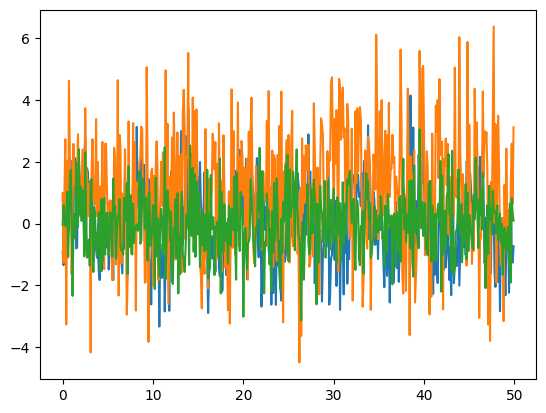

In [121]:
def generate_data(time_range : np.array, noise_multiplier : float = 0.0001) -> np.array:
    
    size = len(time_range)

    f1 = np.sin(time_range) + noise_multiplier * np.random.standard_normal(size = size)
    f2 = 2 * (time_range - np.floor(time_range)) + 2 * noise_multiplier * np.random.standard_normal(size = size)
    f3 = 0.001 * time_range + noise_multiplier * np.random.standard_normal(size = size)
    return np.stack((f1,f2,f3))

data = generate_data(time_range, 1)

plt.plot(time_range, data.transpose())
plt.show()

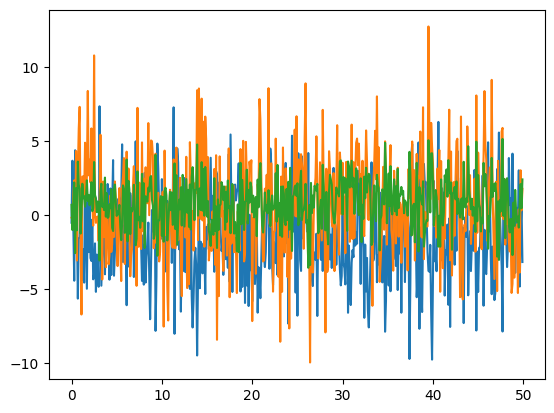

In [122]:
def mix_data(data : np.array) -> np.array:

    a = np.random.standard_normal(size = [3,3])
    return np.matmul(a, data)

mixed_data = mix_data(data)

input_data = mixed_data.transpose()

plt.plot(time_range, mixed_data.transpose())
plt.show()

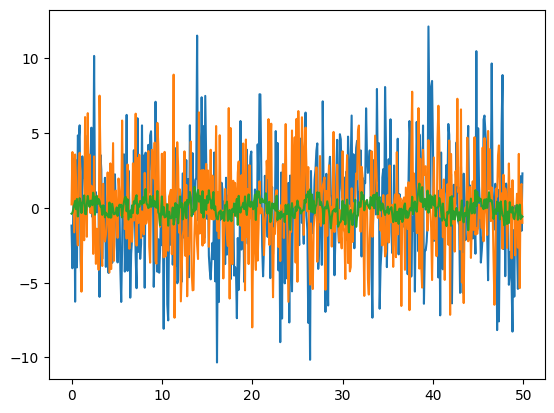

In [123]:
pca = PCA()
pca_result = pca.fit(input_data).transform(input_data)

plt.plot(time_range, pca_result)
plt.show()

c:\Users\TobiasHi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


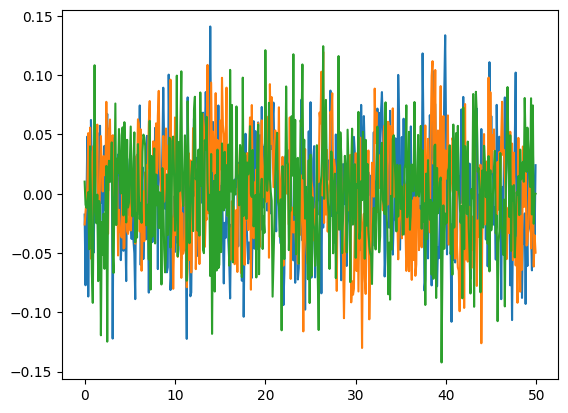

In [124]:
ica = FastICA()
ica_result = ica.fit(input_data).transform(input_data)

plt.plot(time_range, ica_result)
plt.show()

trustworthiness


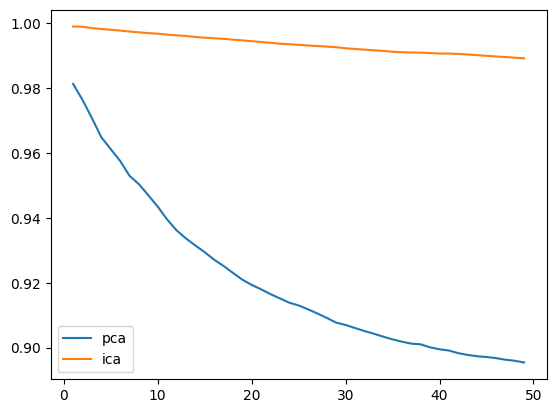

continuity


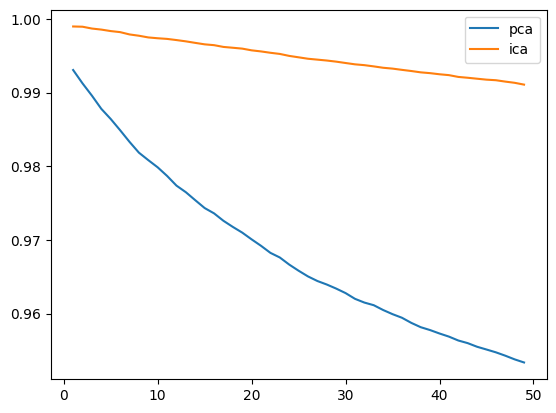

LCMC


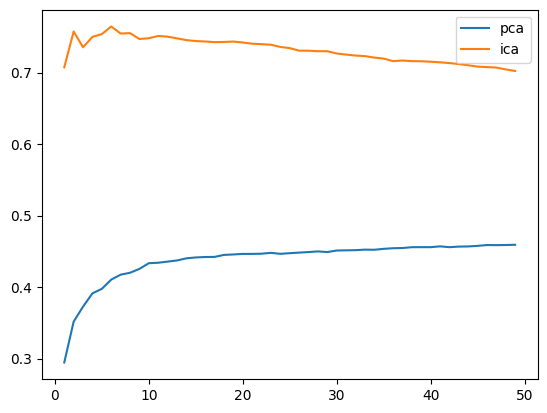

In [125]:
import coranking
from coranking.metrics import trustworthiness, continuity, LCMC

k_range = range(1,50)

Q_pca = coranking.coranking_matrix(data.transpose(), pca_result)
trust_pca = trustworthiness(Q_pca, min_k=1, max_k=50)
cont_pca = continuity(Q_pca, min_k=1, max_k=50)
lcmc_pca = LCMC(Q_pca, min_k=1, max_k=50)

Q_ica = coranking.coranking_matrix(data.transpose(), ica_result)
trust_ica = trustworthiness(Q_ica, min_k=1, max_k=50)
cont_ica = continuity(Q_ica, min_k=1, max_k=50)
lcmc_ica = LCMC(Q_ica, min_k=1, max_k=50)

print("trustworthiness")
plt.plot(k_range, trust_pca, label="pca")
plt.plot(k_range, trust_ica, label="ica")
plt.legend()
plt.show()
print("continuity")
plt.plot(k_range, cont_pca, label="pca")
plt.plot(k_range, cont_ica, label="ica")
plt.legend()
plt.show()
print("LCMC")
plt.plot(k_range, lcmc_pca, label="pca")
plt.plot(k_range, lcmc_ica, label="ica")
plt.legend()
plt.show()